In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\TIL\ML\venv_ml\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
X, y = mnist.data, mnist.target
display(X.shape, y.shape)

(70000, 784)

(70000,)

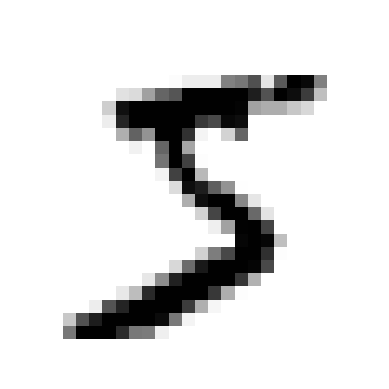

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [36]:
y[0]

'5'

In [38]:
import numpy as np
import pandas as pd
y = y.astype(np.uint8)

In [39]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000], X.to_numpy()[60000:], y[:60000], y[60000:]

In [41]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

## SGD의 장점?
# 1. 작은 단위로 배치 처리가 가능함 --> online 학습에 도움됨. 온라인 학습, 실시간 학습 등....
# 2. 단순하다.
## 단점
# 1. local minima 문제가 발생함.

## linear model 정의
# 일차식만 포함함. 2차식(quadratic function)은 포함하지 않음.

## linear model에는 일반적으로 local minima problem은 생기지 않는다.

SGDClassifier(random_state=42)

In [43]:
sgd_clf.predict([some_digit])

array([ True])

In [47]:
# 성능 평가 지표가 매우매우 많다!

# 교차검증 -- 모델 평가에 좋은 방법이다.
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5): 
    # y_train_5의 class에 맞추어서. 들어간 데이터를 3분할한다. 3분할한 index는 X_train이나 y_train 한쪽의 것이 아니라 두 set모두에 공통으로 들어가 있는 것.
    # print(len(train_index), len(test_index))
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index] # 2개 fold
    y_train_folds = y_train_5[train_index] # 2개 fold
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [48]:
# 위의 결과는 3개 나올 것임.

In [49]:
# 위와 같은 일을 해주는 함수
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [51]:
# 정확도는 좋지 않다. 분류에서 class간 개수 차이가 많이 날 경우 특히 더하다. 그러므로, 정확도 말고 다른걸 봐야 함. 오차행렬..?
# 오차 행렬을 활용하라고 하네요. (confusion matrix) 내가 알던 게 맞네.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# 위의 함수는, 각 fold를 진행하여 얻은 결과를 반환함. 3개 fold가 각각 한 번씩 test 데이터셋이 됐으므로, 그 때의 test 결과값을 여기에 concat하여 다 담는다.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [55]:
display(
precision_score(y_train_5, y_train_pred),
recall_score(y_train_5, y_train_pred),
f1_score(y_train_5, y_train_pred))

0.8370879772350012

0.6511713705958311

0.7325171197343846

In [56]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [61]:
sum(y_train_5), sum(y_train_5==False)

(5421, 54579)

In [62]:
y_train_not_5 = (y_train_5==False)

from sklearn.model_selection import cross_val_predict
y_train_not_5_pred = cross_val_predict(sgd_clf, X_train, y_train_not_5, cv=3)
cm2 = confusion_matrix(y_train_not_5, y_train_not_5_pred)

In [63]:
cm2

array([[ 3530,  1891],
       [  687, 53892]], dtype=int64)

In [64]:
# precision : 정밀도
## 내가 예측한 게 (내 예측과 비교해서) 얼마나 정밀한가. (예측 T중에서, 맞은 개수)
# recall : 재현율
## 내가 얼마나 똑같이 재현(실제와 비교해서)했는가. (실제 T중에서, 맞은 개수)

In [71]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

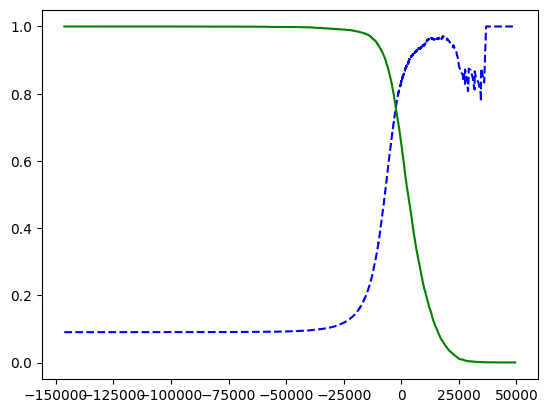

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [80]:
precisions[0]

0.09035

In [81]:
thresholds[:10]

array([-146348.56726174, -142300.00705404, -137588.97581744,
       -137155.6264409 , -136254.05856216, -132044.52713504,
       -129170.59413105, -127012.70021086, -126868.79060084,
       -126331.16218305])

In [86]:
sum(y_scores>=thresholds[0]) # precision, recall 이 하나 더 있는 이유는 아마 left closed / right closed의 차이인 것으로 보임... 어느 인덱스가 어떤 값인지는 모르겠다.

60000

In [87]:
# cross entropy : target을 올바르게 예측할 확률을 다 더하는 것. 앞에 - 가 붙으니까 크면 클수록 좋다.

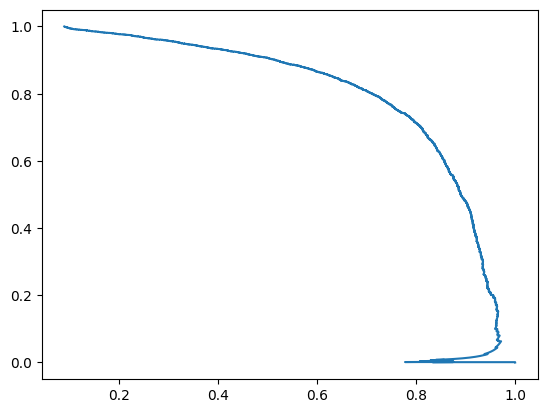

In [88]:
plt.plot(precisions, recalls)
plt.show()

In [89]:
X_train.shape

(60000, 784)

In [90]:
y_train.shape

(60000,)

In [97]:
y_train_01 = y_train.map({0:0, 1:1}).fillna(2).astype(np.int8)

In [98]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
y_scores = cross_val_predict(sgd_clf, X_train, y_train_01, cv=3, method="decision_function")

In [99]:
y_scores[:10]

array([[-28001.65273887, -71568.19506535,   9769.54214622],
       [ 29925.92006902, -92215.7082139 ,  -9916.4155338 ],
       [-40666.58631418, -75358.71620399,  17832.77598262],
       [-35797.01919999,  14034.15543142,  -5552.08948815],
       [-58801.97103024, -56625.86863047,  13128.86548331],
       [ -6307.19882057, -90304.15251714,   5590.88323792],
       [-88872.11192325,  40839.6083491 ,  -4098.43659223],
       [-27919.45322008, -89858.96392325,   7124.09139678],
       [-46493.25203258,  24597.22189833,  -4217.05862313],
       [-35367.92344241, -68596.96818267,   4054.05983027]])

In [112]:
y_scores.argmax(axis=1)==y_train_01

0        True
1        True
2        True
3        True
4        True
         ... 
59995    True
59996    True
59997    True
59998    True
59999    True
Name: class, Length: 60000, dtype: bool

In [118]:
sum(pd.Series((y_scores>0).sum(axis=1)!=1))

3761

In [124]:
y_scores_Series = pd.DataFrame(y_scores)
y_scores_Series[((y_scores_Series>0).sum(axis=1))!=1]

,0,1,2
17,-38288.878435,-18620.982472,-178.165379
31,-41795.032378,-20212.038240,-3937.919963
49,-23136.677764,-50595.076869,-83.003407
68,-164.672999,-93857.196370,-2577.616728
121,10333.182147,-224824.511311,4761.147707
...,...,...,...
59822,-11370.381031,-41887.012133,-2859.145987
59824,2029.818834,-90309.457225,601.135736
59838,-34103.120894,-22721.589647,-929.559329
59912,-35059.641914,5274.807804,10906.288289


In [126]:
indices = y_scores_Series[((y_scores_Series>0).sum(axis=1))!=1].index
y_train_01[indices]

17       2
31       2
49       2
68       0
121      0
        ..
59822    2
59824    2
59838    2
59912    1
59934    0
Name: class, Length: 3761, dtype: int8

In [127]:
## SGD Classifier는 , multiclassifing을 할 때는 각 클래스에 대해 "맞냐/아니냐" 두 개를 나누는 hyperplane을 각각 생성한다.
## 그래서 만들어내는 값이... hyperplane 만들어내는 건 맞음 일단..

## ROC 커브와, precision_recall_curve간 차이를 잘 기억해놓기. ROC랑 precision - recall은 다르다.
## precision : 정밀도, 즉 나의 예측이 정밀한가? 예측값 Positive 중 실제로 Positive인 값이?
## recall : 재현율, 즉. 실제 Positive를 얼마나 잘 재현했나? 실제 Positive 중 예측이 Positive인 값.
## TP : 맞게 Positive로 예측함
## TN : 맞게 Negative로 예측함
## FP : 틀리게 Positive로 예측함
## FN : 틀리게 Negative로 예측함

## ROC : FPR에 대한 TPR. 실제 Negative중 틀리게 Positive로 예측한 비율 대비, 실제 Positive 중 맞게 Positive로 예측한 비율
## FPR은 1-TNR이고 TNR은 실제 Negative중 맞게 Negative로 예측한 비율임. 따라서 ROC의 의미: Negative를 잘 예측하는 게 중요한가, Positive를 잘 예측하는 게 중요한가.

In [128]:
# confusion_matrix : 행렬로 잘 분류됐는지를 확인
# precision_score, recall_score, f1_score : 정밀도, 재현율 관련 metric
# precision_recall_curve : threshold에 대해 precision과 recall을 나타냄

# roc_auc_score : roc커브의 곡선 아래 영역. 크면 클수록 좋다.
# roc_curve : threshold에 대해 FPR과 TPR을 나타냄.

In [2]:
## 230102

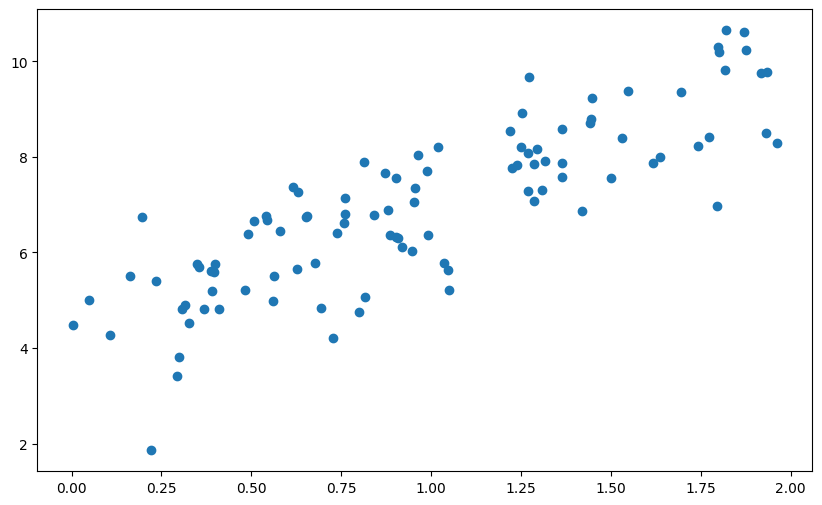

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize = (10, 6))
plt.scatter(X, y)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.26632383]), array([[2.76201681]]))

In [12]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.26632383],
       [9.79035745]])